<a href="https://colab.research.google.com/github/rafaeloliveiralopes/cnn_image_classification/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,659,146 (6.33 MB)

 Trainable params: 1,659,146 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 414s 274ms/step - accuracy: 0.8849 - loss: 0.3666 - val_accuracy: 0.9875 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 436s 270ms/step - accuracy: 0.9777 - loss: 0.0773 - val_accuracy: 0.9888 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 437s 267ms/step - accuracy: 0.9833 - loss: 0.0545 - val_accuracy: 0.9849 - val_loss: 0.0525 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 438s 265ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.9900 - val_loss: 0.0383 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 440s 263ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9902 - val_loss: 0.0367 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 464s 278ms/step - accuracy: 0.9891 - loss: 0.0327 - val_accuracy: 0.9912 - val_loss: 0.0331 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 425s 

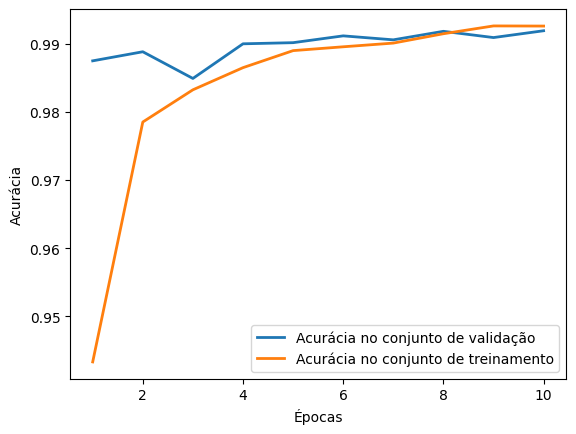

In [1]:
# Cria um modelo sequencial, onde as camadas são empilhadas linearmente
from keras.models import Sequential
# Importa camadas densas (totalmente conectadas), dropout (regularização) e flatten (achatamento)
from keras.layers import Dense, Dropout, Flatten
# Importa camadas de convolução 2D e de pooling máximo 2D, usadas em redes neurais convolucionais
from keras.layers import Conv2D, MaxPooling2D
# Importa o otimizador Adam, utilizado para ajustar os pesos do modelo durante o treinamento
from keras.optimizers import Adam
# Gera lotes de dados de imagem com aumento de dados em tempo real
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Reduz a taxa de aprendizado quando uma métrica para de melhorar
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Função para converter os rótulos em one-hot encoding
from tensorflow.keras.utils import to_categorical
# Carrega o dataset MNIST
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt


# Carrega os dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliza os dados de entrada para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Adiciona uma dimensão para compatibilidade com camadas convolucionais
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converte os rótulos para o formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Inicializa o modelo sequencial
model = Sequential()

# Adiciona uma camada convolucional com 32 filtros, tamanho de kernel 5x5, função de ativação ReLU, padding 'same' e define a forma de entrada
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))

# Adiciona uma segunda camada convolucional com 64 filtros, tamanho de kernel 5x5, função de ativação ReLU e padding 'same'
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))

# Adiciona uma camada de pooling máximo com janela 2x2 para redução de dimensionalidade
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adiciona uma camada Dropout com taxa de 25% para evitar overfitting
model.add(Dropout(0.25))

# Achata a saída das camadas anteriores para formar um vetor unidimensional
model.add(Flatten())

# Adiciona uma camada densa totalmente conectada com 128 neurônios e função de ativação ReLU
model.add(Dense(128, activation='relu'))

# Adiciona uma camada Dropout com taxa de 50% para evitar overfitting
model.add(Dropout(0.5))

# Adiciona a camada de saída com 10 neurônios (correspondentes às classes) e função de ativação softmax para classificação
model.add(Dense(10, activation='softmax'))

# Inicializa o otimizador Adam com parâmetros padrão
optimizer = Adam()
# Compila o modelo especificando a função de perda, o otimizador e as métricas de avaliação
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Exibe um resumo da arquitetura do modelo, incluindo camadas, formas de saída e número de parâmetros
print(model.summary())


# Configura o callback para reduzir a taxa de aprendizado
learning_rate_reduction = ReduceLROnPlateau(
    # Monitora a acurácia na validação
    monitor='val_accuracy',
    # Espera 3 épocas sem melhoria antes de reduzir
    patience=3,
    # Exibe mensagens quando a redução ocorre
    verbose=1,
    # Reduz a taxa de aprendizado pela metade
    factor=0.5,
    # Define a taxa de aprendizado mínima
    min_lr=0.00001
)


# Define o tamanho do lote para 32 amostras
batch_size = 32
# Define o número de épocas de treinamento para 10
epochs = 10

# Treina o modelo com os dados de treinamento
history = model.fit(
    # Dados de entrada para treinamento
    x_train,
    # Rótulos correspondentes aos dados de entrada
    y_train,
    # Número de amostras por atualização de gradiente
    batch_size=batch_size,
    # Número de épocas para treinar o modelo
    epochs=epochs,
    # Porcentagem dos dados de treinamento usada para validação
    validation_split=0.2,
    # Nível de verbosidade; 1 exibe barra de progresso
    verbose=1,
    # Lista de callbacks a serem chamados durante o treinamento
    callbacks=[learning_rate_reduction]
)

# Extrai o dicionário de histórico do objeto 'history'
history_dict = history.history

# Obtém a lista de acurácias de treinamento por época
accuracy = history_dict['accuracy']

# Obtém a lista de acurácias de validação por época
val_accuracy = history_dict['val_accuracy']

# Cria uma faixa de valores correspondente ao número de épocas
range_epochs = range(1, len(accuracy) + 1)

# Define o estilo padrão para os gráficos
plt.style.use('default')

# Plota a acurácia no conjunto de validação ao longo das épocas
accuracy_values = plt.plot(range_epochs, val_accuracy, label='Acurácia no conjunto de validação')

# Plota a acurácia no conjunto de treinamento ao longo das épocas
accuracy_train = plt.plot(range_epochs, accuracy, label='Acurácia no conjunto de treinamento')

# Define a largura das linhas dos gráficos
plt.setp(accuracy_values, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)

# Adiciona rótulo ao eixo x
plt.xlabel('Épocas')

# Adiciona rótulo ao eixo y
plt.ylabel('Acurácia')

# Adiciona uma legenda no canto inferior direito do gráfico
plt.legend(loc='lower right')
plt.show()
